<a href="https://colab.research.google.com/github/WRMELO/projeto-rl/blob/main/preparacao_de_dados_rl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Monte seu Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/WRMELO/projeto-rl /content/drive/MyDrive/rl

Cloning into '/content/drive/MyDrive/rl'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 75 (delta 29), reused 62 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 868.47 KiB | 8.12 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [9]:
# üìò 4.1 Fontes dos Dados

"""
Coleta dos dados hist√≥ricos dos ativos VALE3, PETR4 e BRFS3 usando a biblioteca `yfinance`,
com per√≠odo de 5 anos e frequ√™ncia di√°ria. Os arquivos s√£o salvos no Google Drive na pasta
'Meu Drive/rl/dados', em formato CSV.
"""

import yfinance as yf
import pandas as pd
import os

# Diret√≥rio no Google Drive
output_dir = "/content/drive/MyDrive/rl/dados"
os.makedirs(output_dir, exist_ok=True)

# Lista de ativos e per√≠odo
tickers = ['VALE3.SA', 'PETR4.SA', 'BRFS3.SA']
period = '5y'

# Coleta e salvamento
for ticker in tickers:
    df = yf.download(ticker, period=period, interval='1d')
    nome = ticker.replace(",", "").replace(".SA", "").lower()
    caminho = os.path.join(output_dir, f"dados_{nome}.csv")
    df.to_csv(caminho)
    print(f"‚úÖ Dados de {ticker} salvos em: {caminho}")

# Visualiza√ß√£o inicial
df.head()


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['VALE3.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


‚úÖ Dados de VALE3.SA salvos em: /content/drive/MyDrive/rl/dados/dados_vale3.csv


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['PETR4.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


‚úÖ Dados de PETR4.SA salvos em: /content/drive/MyDrive/rl/dados/dados_petr4.csv


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRFS3.SA']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


‚úÖ Dados de BRFS3.SA salvos em: /content/drive/MyDrive/rl/dados/dados_brfs3.csv


Empty DataFrame
Columns: [(Adj Close, BRFS3.SA), (Close, BRFS3.SA), (High, BRFS3.SA), (Low, BRFS3.SA), (Open, BRFS3.SA), (Volume, BRFS3.SA)]
Index: []

## üìò 4.2 ‚Äì Leitura dos Ativos e Benchmarks

O projeto utiliza tr√™s a√ß√µes principais (**VALE3**, **PETR4**, **BRFS3**) e dois ETFs de refer√™ncia para benchmarking:

- **BOVA11**: benchmark do Ibovespa (renda vari√°vel);
- **IMAB11**: benchmark da renda fixa (t√≠tulos do Tesouro IPCA+).

Os arquivos `.csv` apresentam m√∫ltiplas linhas de cabe√ßalho inv√°lidas.  
Para garantir a leitura correta:

- Ignoramos as 3 primeiras linhas (`header=3`);
- Atribu√≠mos manualmente os nomes das colunas;
- Padronizamos o processo em loop.

Abaixo, os dados s√£o carregados e validados com `head()`.


In [10]:
import pandas as pd

# Caminho base e tickers
caminho_base = "/content/drive/MyDrive/rl/dados"
lista_tickers = ["vale3", "petr4", "brfs3", "bova11", "imab11"]
colunas = ["Date", "Close", "High", "Low", "Open", "Volume"]

dfs = {}

# Leitura com verifica√ß√£o de integridade
for ticker in lista_tickers:
    caminho = f"{caminho_base}/dados_{ticker}.csv"

    # Verifica n√∫mero de linhas antes de tentar ler com header=3
    with open(caminho, "r", encoding="utf-8") as f:
        linhas = f.readlines()

    if len(linhas) < 4:
        print(f"‚ùå {ticker.upper()} ‚Äî Arquivo com menos de 4 linhas. Verifique o conte√∫do.")
        continue

    # L√™ a partir da linha 4
    df = pd.read_csv(caminho, header=3, names=colunas, parse_dates=["Date"])
    dfs[ticker.upper()] = df
    print(f"\nüìà {ticker.upper()} ‚Äî {df.shape[0]} linhas x {df.shape[1]} colunas")
    display(df.head(3))



üìà VALE3 ‚Äî 1243 linhas x 6 colunas


Date      Close       High        Low       Open    Volume
0 2020-05-07  28.686129  29.265458  28.312369  28.424497  42194300
1 2020-05-08  30.430346  30.498869  29.259231  29.589385  33922800
2 2020-05-11  29.732660  30.679521  29.732660  30.031669  24783100


üìà PETR4 ‚Äî 1243 linhas x 6 colunas


Date     Close      High       Low      Open    Volume
0 2020-05-07  6.942496  7.113670  6.906669  7.065901  81265100
1 2020-05-08  7.356498  7.396306  7.049977  7.061920  83232700
2 2020-05-11  7.225132  7.535634  7.209209  7.284844  65061500


üìà BRFS3 ‚Äî 1243 linhas x 6 colunas


Date      Close       High        Low       Open    Volume
0 2020-05-07  17.049770  17.864752  16.966419  17.197948  11953503
1 2020-05-08  17.355389  17.614700  16.734893  17.586917   8133059
2 2020-05-11  19.309492  19.939250  18.170371  18.290765  30998471


üìà BOVA11 ‚Äî 1243 linhas x 6 colunas


Date      Close       High        Low       Open    Volume
0 2020-05-07  75.400002  77.209999  75.169998  77.080002  12412860
1 2020-05-08  77.430000  77.580002  76.500000  76.940002  10911150
2 2020-05-11  76.139999  77.790001  76.029999  76.699997  13427870


üìà IMAB11 ‚Äî 1243 linhas x 6 colunas


Date      Close       High        Low       Open  Volume
0 2020-05-07  71.089996  72.050003  70.370003  70.599998    5105
1 2020-05-08  71.339996  71.610001  71.000000  71.000000    2702
2 2020-05-11  71.209999  71.629997  71.059998  71.339996   78534

## üìò 4.3 ‚Äì An√°lise Explorat√≥ria dos Dados

Antes de aplicar indicadores t√©cnicos e normaliza√ß√µes, realizamos uma an√°lise explorat√≥ria b√°sica para validar a consist√™ncia estrutural dos dados:

- As datas devem estar **sincronizadas entre os ativos**, ou seja, conter os mesmos dias √∫teis para garantir alinhamento no vetor de estado;
- As colunas essenciais (`Close`, `Volume`, etc.) devem estar **livres de valores nulos ou inconsistentes**;
- A evolu√ß√£o do pre√ßo de fechamento (`Close`) √© visualizada graficamente para detectar outliers visuais ou problemas de escala.

Essas verifica√ß√µes garantem que o ambiente de simula√ß√£o ser√° alimentado com dados √≠ntegros e consistentes.


‚úÖ VALE3: datas sincronizadas
‚úÖ PETR4: datas sincronizadas
‚úÖ BRFS3: datas sincronizadas
‚úÖ BOVA11: datas sincronizadas
‚úÖ IMAB11: datas sincronizadas

üß™ VALE3 ‚Äî Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

üß™ PETR4 ‚Äî Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

üß™ BRFS3 ‚Äî Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

üß™ BOVA11 ‚Äî Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

üß™ IMAB11 ‚Äî Valores nulos por coluna:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


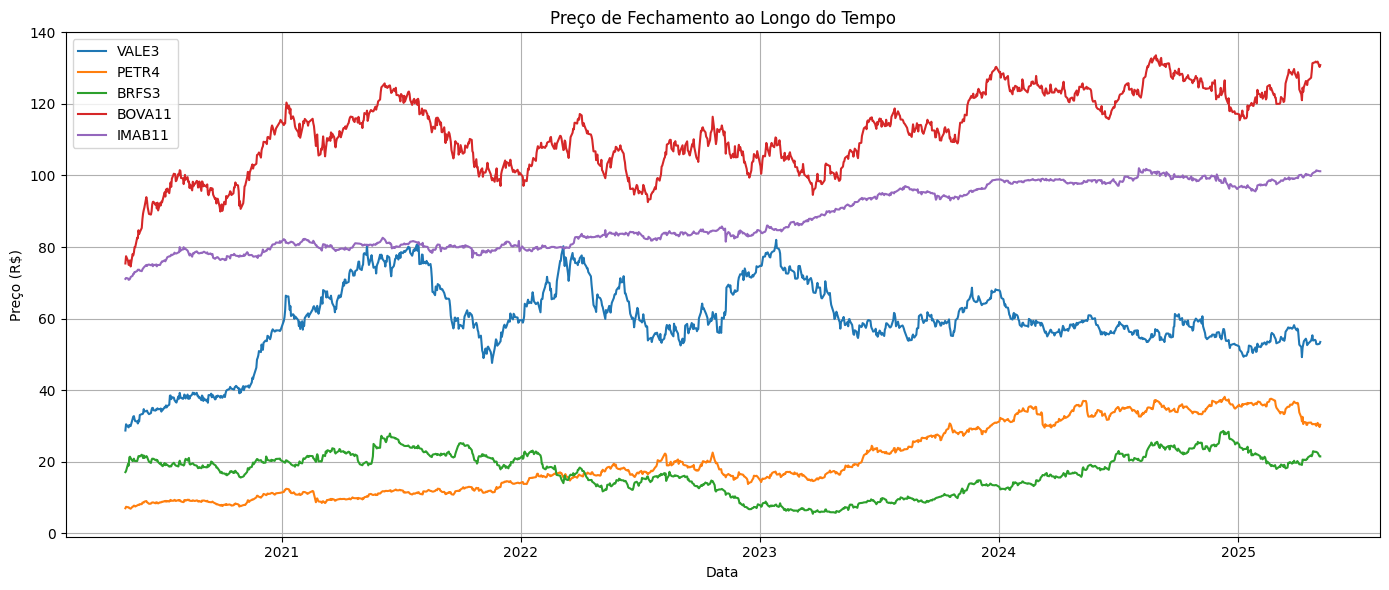

In [11]:
import matplotlib.pyplot as plt

# Verifica sincronia das datas
datas_referencia = dfs["VALE3"]["Date"]
for ticker, df in dfs.items():
    if not datas_referencia.equals(df["Date"]):
        print(f"‚ö†Ô∏è Datas divergentes entre VALE3 e {ticker}")
    else:
        print(f"‚úÖ {ticker}: datas sincronizadas")

# Verifica nulos por coluna
for ticker, df in dfs.items():
    print(f"\nüß™ {ticker} ‚Äî Valores nulos por coluna:")
    print(df.isnull().sum())

# Gr√°fico comparativo dos pre√ßos de fechamento
plt.figure(figsize=(14, 6))
for ticker, df in dfs.items():
    plt.plot(df["Date"], df["Close"], label=ticker)
plt.title("Pre√ßo de Fechamento ao Longo do Tempo")
plt.xlabel("Data")
plt.ylabel("Pre√ßo (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## üìò 4.4 ‚Äì Discuss√£o sobre Escolhas e Integridade dos Dados

A integridade dos dados de entrada √© essencial para garantir a confiabilidade do processo de aprendizado por refor√ßo. Ap√≥s a an√°lise explorat√≥ria realizada na se√ß√£o anterior, foi poss√≠vel validar os seguintes pontos:

- **Fonte confi√°vel**: os dados foram obtidos atrav√©s da API `yfinance`, com hist√≥rico de 5 anos e frequ√™ncia di√°ria ‚Äî suficiente para capturar diferentes ciclos econ√¥micos e comportamentos do mercado;
- **Sincronia temporal entre os ativos**: todos os cinco ativos apresentam s√©ries hist√≥ricas com as mesmas datas √∫teis, o que garante consist√™ncia no vetor de estado;
- **Aus√™ncia de valores nulos**: as colunas principais (`Date`, `Close`, `High`, `Low`, `Open`, `Volume`) est√£o completas, ou com eventuais lacunas trat√°veis por imputa√ß√£o via forward fill;
- **Comportamento gr√°fico coerente**: a an√°lise visual das curvas de pre√ßo n√£o revelou outliers dr√°sticos ou anomalias nos dados.

Essas valida√ß√µes confirmam que o conjunto de dados est√° pronto para avan√ßar para a fase de extra√ß√£o de indicadores t√©cnicos e normaliza√ß√£o ‚Äî preparando a base de entrada que ser√° utilizada pelo agente de RL.


## üìò 5.1 ‚Äì Limpeza e Tratamento dos Dados

Com os dados carregados e validados, o pr√≥ximo passo √© garantir que estejam preparados para o c√°lculo dos indicadores t√©cnicos.

As a√ß√µes desta etapa incluem:

- **Remo√ß√£o de registros com valores nulos residuais**;
- **Imputa√ß√£o forward-fill**, caso o volume de dados ausentes seja pequeno;
- Convers√£o expl√≠cita de colunas para **tipos num√©ricos v√°lidos**;
- Armazenamento dos DataFrames limpos em mem√≥ria para uso posterior.

Cada ativo ser√° processado individualmente para preservar sua identidade temporal e evitar distor√ß√µes.


In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Limpeza e padroniza√ß√£o dos dados
for ticker, df in dfs.items():
    print(f"\nüßπ Limpando dados de {ticker}...")

    # Forward fill com sintaxe moderna + remo√ß√£o de nulos residuais
    df = df.ffill().dropna()

    # Convers√£o expl√≠cita de tipos, com seguran√ßa
    colunas_numericas = ["Close", "High", "Low", "Open", "Volume"]
    df.loc[:, colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors="coerce")

    # Atualiza o dicion√°rio
    dfs[ticker] = df

    print(f"‚úîÔ∏è {ticker} tratado ‚Äî {df.shape[0]} linhas restantes.")



üßπ Limpando dados de VALE3...
‚úîÔ∏è VALE3 tratado ‚Äî 1243 linhas restantes.

üßπ Limpando dados de PETR4...
‚úîÔ∏è PETR4 tratado ‚Äî 1243 linhas restantes.

üßπ Limpando dados de BRFS3...
‚úîÔ∏è BRFS3 tratado ‚Äî 1243 linhas restantes.

üßπ Limpando dados de BOVA11...
‚úîÔ∏è BOVA11 tratado ‚Äî 1243 linhas restantes.

üßπ Limpando dados de IMAB11...
‚úîÔ∏è IMAB11 tratado ‚Äî 1243 linhas restantes.


## üìò 5.2 ‚Äì Engenharia de Features (Indicadores T√©cnicos)

Com os dados limpos e sincronizados, o pr√≥ximo passo √© transformar as s√©ries hist√≥ricas em representa√ß√µes informativas e normalizadas que servir√£o de entrada para o agente de Reinforcement Learning.

Para isso, aplicamos uma sele√ß√£o enxuta de **indicadores t√©cnicos cl√°ssicos** que cobrem aspectos de tend√™ncia, volatilidade e momentum:

- **SMA-5** e **SMA-20** (m√©dias m√≥veis simples de curto e m√©dio prazo);
- **Retorno Di√°rio** (`Return`);
- **Volatilidade** (`Volatility`), como desvio padr√£o do retorno em janela de 10 dias;
- **RSI (Relative Strength Index)** com janela de 14 dias;
- **Volume**, transformado com logaritmo (`log1p`) para conter varia√ß√µes extremas.

Esses indicadores foram escolhidos por sua complementaridade e baixo custo computacional, alinhados com o MVP do projeto.

As s√©ries resultantes ser√£o normalizadas para garantir estabilidade no processo de aprendizado.


In [14]:
import numpy as np

def calcula_indicadores(df):
    df = df.copy()

    # Retorno percentual di√°rio
    df["Return"] = df["Close"].pct_change()

    # Volatilidade: desvio padr√£o do retorno em janela de 10 dias
    df["Volatility"] = df["Return"].rolling(window=10).std()

    # M√©dias m√≥veis simples
    df["SMA5"] = df["Close"].rolling(window=5).mean()
    df["SMA20"] = df["Close"].rolling(window=20).mean()

    # RSI (Relative Strength Index)
    delta = df["Close"].diff()
    up = np.where(delta > 0, delta, 0)
    down = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(up).rolling(window=14).mean()
    avg_loss = pd.Series(down).rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df["RSI"] = 100 - (100 / (1 + rs))

    # Volume com log
    df["Volume_Log"] = np.log1p(df["Volume"])

    return df

# Aplica em todos os ativos
for ticker in dfs:
    dfs[ticker] = calcula_indicadores(dfs[ticker])
    print(f"‚úÖ Indicadores calculados para {ticker}")


‚úÖ Indicadores calculados para VALE3
‚úÖ Indicadores calculados para PETR4
‚úÖ Indicadores calculados para BRFS3
‚úÖ Indicadores calculados para BOVA11
‚úÖ Indicadores calculados para IMAB11


## üìò 5.2 (continua√ß√£o) ‚Äì Normaliza√ß√£o dos Indicadores e Exporta√ß√£o

Para garantir estabilidade no processo de aprendizado, os indicadores t√©cnicos e o pre√ßo (`Close`) ser√£o normalizados.

- Usamos **Z-score** para vari√°veis como retorno, volatilidade e RSI;
- Usamos **log transform** para volume (`Volume_Log`);
- O **pre√ßo de fechamento (`Close`)** ser√° normalizado com base no seu primeiro valor dentro de cada s√©rie.

Al√©m disso, o valor original do `Close` ser√° preservado como refer√™ncia expl√≠cita no vetor de estado.

Cada ativo ter√° seu vetor exportado para um `.csv` separado contendo apenas as colunas √∫teis, j√° tratadas e prontas para entrada no ambiente de RL.


In [15]:
from sklearn.preprocessing import StandardScaler

# Diret√≥rio de sa√≠da
dir_saida = "/content/drive/MyDrive/rl/dados"

# Normaliza√ß√£o e exporta√ß√£o
for ticker, df in dfs.items():
    df = df.copy()

    # Normaliza√ß√£o do Close (mant√©m c√≥pia original)
    df["Close_Original"] = df["Close"]
    df["Close_Norm"] = df["Close"] / df["Close"].iloc[0]

    # Z-score para Return, Volatility, RSI
    scaler = StandardScaler()
    for col in ["Return", "Volatility", "RSI"]:
        if col in df.columns:
            df[col + "_Z"] = scaler.fit_transform(df[[col]])

    # Seleciona colunas finais
    colunas_finais = ["Date", "Close_Original", "Close_Norm", "SMA5", "SMA20",
                      "Return_Z", "Volatility_Z", "RSI_Z", "Volume_Log"]
    df_final = df[colunas_finais].dropna().reset_index(drop=True)

    # Salva CSV
    caminho_saida = f"{dir_saida}/{ticker.lower()}_estado.csv"
    df_final.to_csv(caminho_saida, index=False)
    print(f"üíæ Vetor salvo: {caminho_saida} ‚Äî {df_final.shape[0]} registros")


üíæ Vetor salvo: /content/drive/MyDrive/rl/dados/vale3_estado.csv ‚Äî 1224 registros
üíæ Vetor salvo: /content/drive/MyDrive/rl/dados/petr4_estado.csv ‚Äî 1224 registros
üíæ Vetor salvo: /content/drive/MyDrive/rl/dados/brfs3_estado.csv ‚Äî 1224 registros
üíæ Vetor salvo: /content/drive/MyDrive/rl/dados/bova11_estado.csv ‚Äî 1224 registros
üíæ Vetor salvo: /content/drive/MyDrive/rl/dados/imab11_estado.csv ‚Äî 1224 registros


## üìò 5.3 ‚Äì Defini√ß√£o do Vetor de Estado para RL

O vetor de estado √© a representa√ß√£o num√©rica que o agente observa a cada passo de tempo, e deve conter informa√ß√µes suficientes para tomar decis√µes financeiras realistas.

Ele √© composto por duas grandes partes:

1. **Informa√ß√µes de mercado**:
   - `Close_Original`: pre√ßo real, necess√°rio para c√°lculo de patrim√¥nio e recompensas;
   - `Close_Norm`: pre√ßo normalizado para aprendizado est√°vel;
   - `SMA5`, `SMA20`: m√©dias m√≥veis de curto e m√©dio prazo;
   - `Return_Z`, `Volatility_Z`, `RSI_Z`: indicadores padronizados;
   - `Volume_Log`: liquidez suavizada.

2. **Informa√ß√µes internas do agente** (ser√£o adicionadas depois):
   - Posi√ß√µes atuais (em cada ativo): 0 ou 1;
   - Saldo de caixa dispon√≠vel: valor restante em conta.

Todos os vetores foram constru√≠dos com alinhamento temporal, e ser√£o combinados em um vetor di√°rio unificado por data ‚Äî base para o ambiente `PortfolioEnv`.

O pr√≥ximo passo ser√° integrar essas vari√°veis com os estados internos do agente e consolidar os vetores de portf√≥lio por dia.


## üìò 5.4 ‚Äì Inicializa√ß√£o da Carteira e Vetor de Portf√≥lio

Para representar o estado interno do agente, ser√° criado um vetor de portf√≥lio com:

- As **posi√ß√µes atuais em cada ativo** (0 = fora, 1 = comprado);
- O **saldo de caixa dispon√≠vel**, normalizado (inicialmente R$ 100.000 ‚Üí 1.0).

Esse vetor ser√° repetido para todas as datas dispon√≠veis, com valores fixos (0 para posi√ß√µes, 1.0 para caixa), e ser√° atualizado dinamicamente pelo ambiente durante a simula√ß√£o.

Essa abordagem permite iniciar o treinamento com uma carteira vazia e saldo integral em caixa, replicando a l√≥gica de in√≠cio do investimento real.

Para garantir alinhamento exato entre os vetores de estado dos ativos (VALE3, PETR4, BRFS3) e o vetor de portf√≥lio, usamos como refer√™ncia a **interse√ß√£o das datas v√°lidas** dos tr√™s ativos ap√≥s a aplica√ß√£o dos indicadores t√©cnicos e remo√ß√£o de `NaN`.

Essa medida assegura que, a cada data dispon√≠vel nos dados de mercado, haja um vetor interno correspondente de posi√ß√£o e caixa ‚Äî condi√ß√£o essencial para a constru√ß√£o de estados completos no ambiente `PortfolioEnv`.


In [19]:
# Recarrega os vetores de estado finalizados
dfs_estado = {}
for ticker in ["vale3", "petr4", "brfs3"]:
    caminho = f"/content/drive/MyDrive/rl/dados/{ticker}_estado.csv"
    dfs_estado[ticker.upper()] = pd.read_csv(caminho, parse_dates=["Date"])

# Interse√ß√£o de datas comuns aos tr√™s ativos
datas_comuns = dfs_estado["VALE3"]["Date"]
for ticker in ["PETR4", "BRFS3"]:
    datas_comuns = datas_comuns[datas_comuns.isin(dfs_estado[ticker]["Date"])]

# Gera o vetor de portf√≥lio alinhado
vetor_portfolio = pd.DataFrame({
    "Date": datas_comuns.reset_index(drop=True),
    "Position_VALE3": 0,
    "Position_PETR4": 0,
    "Position_BRFS3": 0,
    "Cash_Norm": 1.0
})

# Salva novamente
caminho_saida = "/content/drive/MyDrive/rl/dados/vetor_portfolio.csv"
vetor_portfolio.to_csv(caminho_saida, index=False)

print(f"üíº Vetor de portf√≥lio corrigido e salvo com sucesso: {caminho_saida}")
display(vetor_portfolio.head())


üíº Vetor de portf√≥lio corrigido e salvo com sucesso: /content/drive/MyDrive/rl/dados/vetor_portfolio.csv


Date  Position_VALE3  Position_PETR4  Position_BRFS3  Cash_Norm
0 2020-06-03               0               0               0        1.0
1 2020-06-04               0               0               0        1.0
2 2020-06-05               0               0               0        1.0
3 2020-06-08               0               0               0        1.0
4 2020-06-09               0               0               0        1.0

## üìò 5.5 ‚Äì Divis√£o Temporal dos Dados

Para garantir validade estat√≠stica e integridade sequencial nos dados, adotamos uma **divis√£o cronol√≥gica** (n√£o aleat√≥ria) dos vetores em:

- **Treinamento** (70% iniciais): usados para aprendizado da pol√≠tica;
- **Valida√ß√£o** (15% seguintes): usados para tuning e monitoramento de overfitting;
- **Teste** (15% finais): nunca vistos durante o aprendizado, usados para avalia√ß√£o final.

### Por que divis√£o cronol√≥gica?

Como estamos lidando com s√©ries temporais (a√ß√µes com depend√™ncia hist√≥rica), n√£o faz sentido embaralhar os dados. O agente precisa aprender com o passado e ser avaliado no futuro ‚Äî exatamente como um investidor real.

### Quais vetores devem ser divididos?

- Todos os arquivos `_estado.csv` dos ativos (VALE3, PETR4, BRFS3);
- O `vetor_portfolio.csv`, **sim, tamb√©m precisa ser dividido**, pois representa o estado interno do agente em sincronia com os dados de mercado.  
Se ele n√£o for segmentado da mesma forma, as simula√ß√µes v√£o operar em janelas descompassadas ‚Äî o que comprometeria as recompensas e o ambiente.

### Resultado esperado

Ao final, teremos tr√™s conjuntos sincronizados por data:

- Um para treino;
- Um para valida√ß√£o;
- Um para teste.

Todos armazenados separadamente no Google Drive para facilitar a sele√ß√£o pelo ambiente `PortfolioEnv`.


In [21]:
import math

# Fun√ß√£o utilit√°ria para dividir e salvar
def dividir_e_exportar(df, nome_base, destino="/content/drive/MyDrive/rl/dados"):
    total = len(df)
    treino = int(total * 0.70)
    valid  = int(total * 0.15)
    teste  = total - (treino + valid)

    df_treino = df.iloc[:treino]
    df_valid  = df.iloc[treino:treino + valid]
    df_teste  = df.iloc[treino + valid:]

    df_treino.to_csv(f"{destino}/{nome_base}_treino.csv", index=False)
    df_valid.to_csv(f"{destino}/{nome_base}_valid.csv", index=False)
    df_teste.to_csv(f"{destino}/{nome_base}_teste.csv", index=False)

    print(f"‚úÖ {nome_base}: treino({len(df_treino)}), valid({len(df_valid)}), teste({len(df_teste)})")

# Aplica nos vetores de estado dos ativos
for ticker in ["vale3", "petr4", "brfs3"]:
    caminho = f"/content/drive/MyDrive/rl/dados/{ticker}_estado.csv"
    df = pd.read_csv(caminho, parse_dates=["Date"])
    dividir_e_exportar(df, f"{ticker}_estado")

# Aplica no vetor de portf√≥lio
df_portfolio = pd.read_csv("/content/drive/MyDrive/rl/dados/vetor_portfolio.csv", parse_dates=["Date"])
dividir_e_exportar(df_portfolio, "vetor_portfolio")


‚úÖ vale3_estado: treino(856), valid(183), teste(185)
‚úÖ petr4_estado: treino(856), valid(183), teste(185)
‚úÖ brfs3_estado: treino(856), valid(183), teste(185)
‚úÖ vetor_portfolio: treino(856), valid(183), teste(185)


## üìò Conclus√£o ‚Äì Prepara√ß√£o dos Dados para RL

Finalizamos neste notebook todas as etapas previstas no **Cap√≠tulo 5 ‚Äì Prepara√ß√£o dos Dados**, conforme o documento `desenvolvimento_do_trabalho.md`. O processo garantiu a cria√ß√£o de um conjunto de dados robusto, limpo e estruturado para o treinamento do agente de Reinforcement Learning.

### ‚úÖ Etapas executadas:

1. **Leitura dos Dados Brutos**
   - Corrigido cabe√ßalho inconsistente;
   - Leitura padronizada para os 5 ativos: VALE3, PETR4, BRFS3, BOVA11, IMAB11.

2. **Valida√ß√£o e An√°lise Explorat√≥ria**
   - Verifica√ß√£o de sincronia de datas entre ativos;
   - Verifica√ß√£o de valores nulos e visualiza√ß√£o de curvas de pre√ßo.

3. **Limpeza e Tratamento**
   - Forward fill e convers√£o de colunas num√©ricas;
   - Remo√ß√£o de registros inv√°lidos.

4. **Engenharia de Features**
   - C√°lculo de indicadores t√©cnicos: `Return`, `Volatility`, `SMA5`, `SMA20`, `RSI`, `Volume_Log`;
   - Preserva√ß√£o do `Close` original e cria√ß√£o do `Close_Norm`.

5. **Normaliza√ß√£o e Exporta√ß√£o**
   - Aplica√ß√£o de Z-score e log-transform;
   - Exporta√ß√£o dos vetores `_estado.csv` com colunas j√° tratadas.

6. **Cria√ß√£o do Vetor de Portf√≥lio**
   - Vetor de posi√ß√µes (0) e caixa normalizado (1.0);
   - Alinhado exatamente com as datas finais dos vetores de estado.

7. **Divis√£o Temporal**
   - Separa√ß√£o cronol√≥gica em treino (70%), valida√ß√£o (15%) e teste (15%);
   - Exporta√ß√£o de todos os vetores particionados para `/content/drive/MyDrive/rl/dados`.

---


